<a href="https://colab.research.google.com/github/Devanshu3214/Devanshu3214/blob/main/Store_Forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [301]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn
import torch.optim.adam
import seaborn as sns

In [302]:
#importing data
holiday_event=pd.read_csv("/content/holidays_events.csv")
oil=pd.read_csv("/content/oil.csv")
stores=pd.read_csv("/content/stores.csv")
testdata=pd.read_csv("/content/test.csv")
train_data=pd.read_csv("/content/train.csv")
trans=pd.read_csv("/content/transactions.csv")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1218 entries, 0 to 1217
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date        1218 non-null   object 
 1   dcoilwtico  1175 non-null   float64
dtypes: float64(1), object(1)
memory usage: 19.2+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1218 entries, 0 to 1217
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    1218 non-null   object 
 1   Prices  1175 non-null   float64
dtypes: float64(1), object(1)
memory usage: 19.2+ KB


<Axes: xlabel='date'>

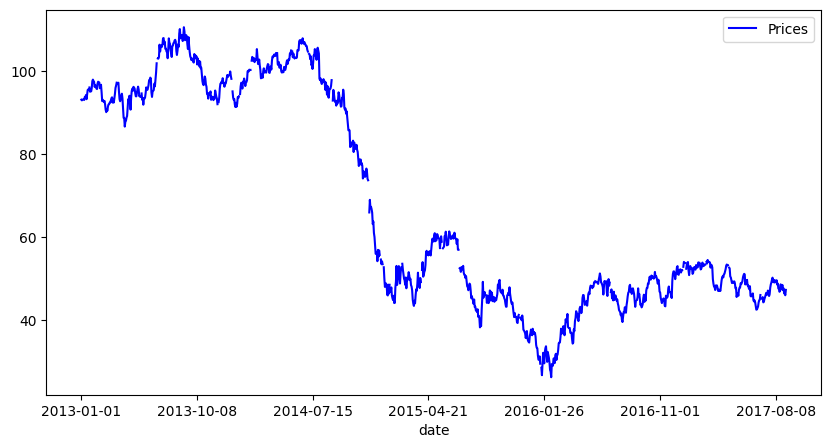

In [303]:
#Oil Done
oil.info()
oil1=oil.rename(columns={"dcoilwtico":"Prices"}) #no idea what dcoilwtico is ??
oil1.info() #43 null values in oil prices >> data based on date
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10,5))
oil1.plot.line(x="date", y="Prices", color="b", ax=axes, rot=0)

In [304]:
trans.head() #data based on date store number and transaction numbers

,date,store_nbr,transactions
0,2013-01-01,25,770
1,2013-01-02,1,2111
2,2013-01-02,2,2358
3,2013-01-02,3,3487
4,2013-01-02,4,1922


In [305]:
testdata['store_nbr'].value_counts() #so every store has 528 indexes in test data

1     528
46    528
36    528
37    528
38    528
39    528
4     528
40    528
41    528
42    528
43    528
44    528
45    528
47    528
10    528
48    528
49    528
5     528
50    528
51    528
52    528
53    528
54    528
6     528
7     528
8     528
35    528
34    528
33    528
32    528
11    528
12    528
13    528
14    528
15    528
16    528
17    528
18    528
19    528
2     528
20    528
21    528
22    528
23    528
24    528
25    528
26    528
27    528
28    528
29    528
3     528
30    528
31    528
9     528
Name: store_nbr, dtype: int64

In [306]:
holiday_event.loc[holiday_event.type=="Transfer", "description"] = holiday_event.loc[holiday_event.type == "Transfer", "description"].str.replace("Translado", "") 
holiday_event['type'].replace("Transfer", "Normal", inplace = True)
holiday_event.describe

<bound method NDFrame.describe of            date        type    locale locale_name  \
0    2012-03-02     Holiday     Local       Manta   
1    2012-04-01     Holiday  Regional    Cotopaxi   
2    2012-04-12     Holiday     Local      Cuenca   
3    2012-04-14     Holiday     Local    Libertad   
4    2012-04-21     Holiday     Local    Riobamba   
..          ...         ...       ...         ...   
345  2017-12-22  Additional  National     Ecuador   
346  2017-12-23  Additional  National     Ecuador   
347  2017-12-24  Additional  National     Ecuador   
348  2017-12-25     Holiday  National     Ecuador   
349  2017-12-26  Additional  National     Ecuador   

                       description  transferred  
0               Fundacion de Manta        False  
1    Provincializacion de Cotopaxi        False  
2              Fundacion de Cuenca        False  
3        Cantonizacion de Libertad        False  
4        Cantonizacion de Riobamba        False  
..                           

In [307]:
def conv_date(df):
  df['date']=pd.to_datetime(df['date'], format = "%Y-%m-%d")

conv_date(holiday_event)
conv_date(oil1)
conv_date(train_data)
conv_date(testdata)
conv_date(trans)

In [308]:
new_train = train_data.merge(holiday_event, on = 'date', how = 'left')
new_train = new_train.merge(oil1, on = 'date', how = 'left')
new_train = new_train.merge(stores, on = 'store_nbr', how = 'left')
new_train = new_train.merge(trans, on = ['date', 'store_nbr'], how = 'left')

([<matplotlib.patches.Wedge at 0x7f2d9c56a260>,
 [Text(-1.0528190116173233, 0.31870382610995246, 'GROCERY I'),
  Text(0.23883170761159428, -1.0737594774619361, 'BEVERAGES'),
  Text(1.0956847184074774, -0.09733960061725826, 'PRODUCE'),
  Text(0.8198284630823534, 0.7334039072162261, 'CLEANING'),
  Text(0.2610110629931384, 1.0685846831183723, 'DAIRY')],
 [Text(-0.5742649154276308, 0.1738384506054286, '40.6%'),
  Text(0.13027184051541504, -0.5856869877065106, '25.7%'),
  Text(0.5976462100404422, -0.053094327609413586, '14.5%'),
  Text(0.4471791616812836, 0.40003849484521414, '11.5%'),
  Text(0.14236967072353005, 0.5828643726100212, '7.6%')])

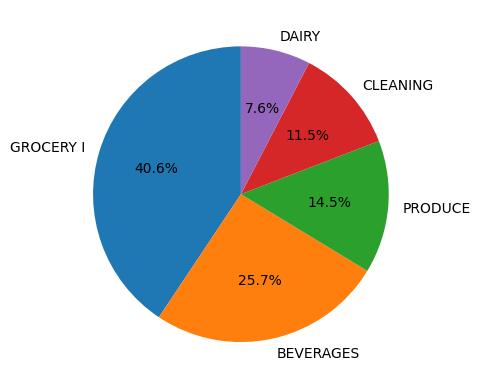

In [309]:

#which family has highest sales
familysales=new_train.groupby('family')['sales'].sum()
family_sales_sorted=familysales.sort_values(ascending=False)
top_families = family_sales_sorted.head(5)
plt.pie(top_families, labels=top_families.index, autopct='%1.1f%%', startangle=90)



,id,date,store_nbr,family,sales,onpromotion,type_x,locale,locale_name,description,transferred,Prices,city,state,type_y,cluster,transactions
561,561,2013-01-01,25,AUTOMOTIVE,0.0,0,Holiday,National,Ecuador,Primer dia del ano,False,93.14,Salinas,Santa Elena,D,1,770.0
562,562,2013-01-01,25,BABY CARE,0.0,0,Holiday,National,Ecuador,Primer dia del ano,False,93.14,Salinas,Santa Elena,D,1,770.0
563,563,2013-01-01,25,BEAUTY,2.0,0,Holiday,National,Ecuador,Primer dia del ano,False,93.14,Salinas,Santa Elena,D,1,770.0
564,564,2013-01-01,25,BEVERAGES,810.0,0,Holiday,National,Ecuador,Primer dia del ano,False,93.14,Salinas,Santa Elena,D,1,770.0
565,565,2013-01-01,25,BOOKS,0.0,0,Holiday,National,Ecuador,Primer dia del ano,False,93.14,Salinas,Santa Elena,D,1,770.0


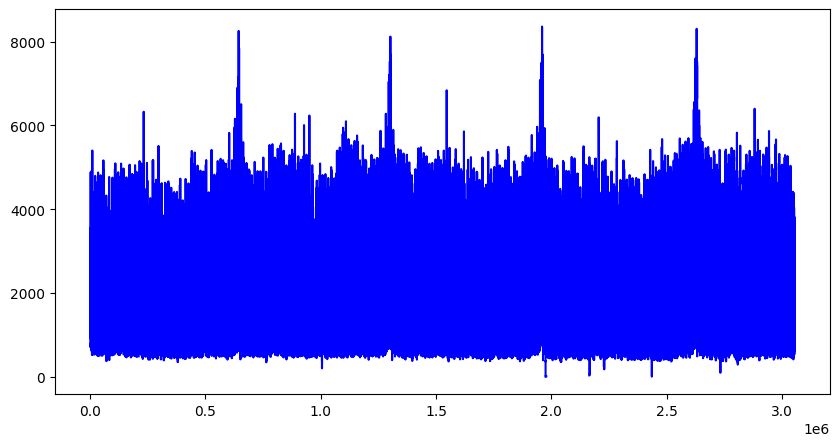

In [310]:


fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10,5))
new_train['transactions'].plot.line(x="Date", y="Transactions", color="b", ax=axes, rot=0)
new_train["Prices"] = new_train["Prices"].fillna(method = 'bfill')
new_train = new_train[new_train["transactions"].isnull() == False]
new_train.head()

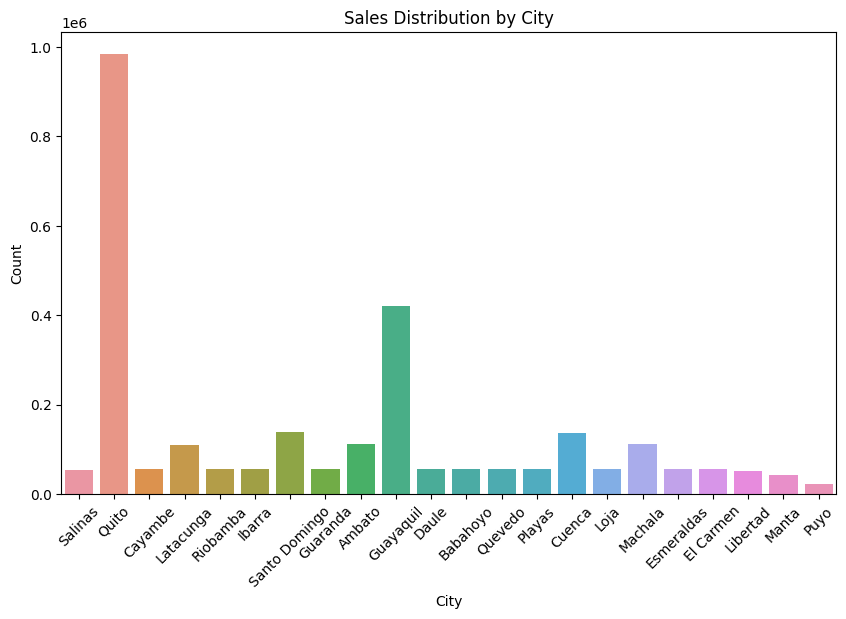

In [311]:
plt.figure(figsize=(10, 6)) 
sns.countplot(data=new_train, x='city') #xhange x with state for state distribution
plt.xlabel('City')
plt.ylabel('Count')
plt.title('Sales Distribution by City')
plt.xticks(rotation=45)
plt.show()

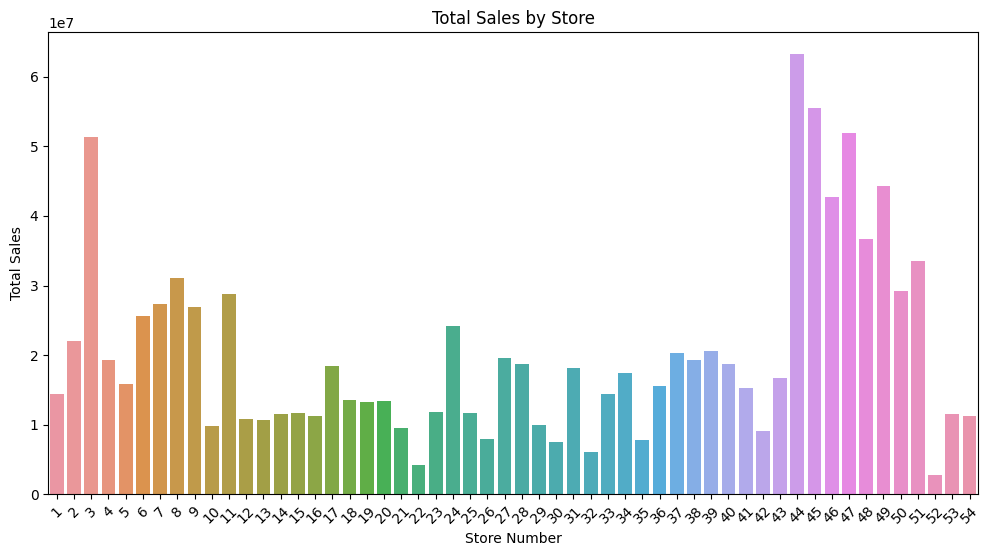

In [312]:
# Calculate the total sales for each store
store_sales = new_train.groupby('store_nbr')['sales'].sum().reset_index()
store_sales = store_sales.sort_values('sales', ascending=False)
plt.figure(figsize=(12, 6))
sns.barplot(data=store_sales, x='store_nbr', y='sales')
plt.xlabel('Store Number')
plt.ylabel('Total Sales')
plt.title('Total Sales by Store')
plt.xticks(rotation=45)
plt.show()

In [313]:
#Autocorrelation to check correlation between time series and its lagged values 
sales_series = new_train['sales']
autocorr_values = sales_series.autocorr()
print("Autocorrelation:", autocorr_values)

Autocorrelation: -0.005782198267381363


In [314]:
new_train=new_train.rename(columns={'type_x':"holiday_type",'type_y':'store_type'})
new_train['holiday_type'] = new_train['holiday_type'].replace({np.nan : "Normal"})

In [315]:
new_train.head()

,id,date,store_nbr,family,sales,onpromotion,holiday_type,locale,locale_name,description,transferred,Prices,city,state,store_type,cluster,transactions
561,561,2013-01-01,25,AUTOMOTIVE,0.0,0,Holiday,National,Ecuador,Primer dia del ano,False,93.14,Salinas,Santa Elena,D,1,770.0
562,562,2013-01-01,25,BABY CARE,0.0,0,Holiday,National,Ecuador,Primer dia del ano,False,93.14,Salinas,Santa Elena,D,1,770.0
563,563,2013-01-01,25,BEAUTY,2.0,0,Holiday,National,Ecuador,Primer dia del ano,False,93.14,Salinas,Santa Elena,D,1,770.0
564,564,2013-01-01,25,BEVERAGES,810.0,0,Holiday,National,Ecuador,Primer dia del ano,False,93.14,Salinas,Santa Elena,D,1,770.0
565,565,2013-01-01,25,BOOKS,0.0,0,Holiday,National,Ecuador,Primer dia del ano,False,93.14,Salinas,Santa Elena,D,1,770.0


In [316]:
new_train=new_train.drop(['locale_name','description','transferred'],axis=1)
new_train=new_train.drop(['locale','family','city','state','cluster','store_type'],axis=1)

In [317]:
new_train.head()

,id,date,store_nbr,sales,onpromotion,holiday_type,Prices,transactions
561,561,2013-01-01,25,0.0,0,Holiday,93.14,770.0
562,562,2013-01-01,25,0.0,0,Holiday,93.14,770.0
563,563,2013-01-01,25,2.0,0,Holiday,93.14,770.0
564,564,2013-01-01,25,810.0,0,Holiday,93.14,770.0
565,565,2013-01-01,25,0.0,0,Holiday,93.14,770.0


In [318]:
new_train.isnull().sum() #so no null values 
new_train['holiday_type'].unique()

array(['Holiday', 'Normal', 'Work Day', 'Additional', 'Event', 'Bridge'],
      dtype=object)

In [319]:
#using fit transform
from sklearn.preprocessing import OneHotEncoder
column = ["holiday_type"] #column name   
object2 = OneHotEncoder(handle_unknown = "ignore", sparse = False) 
low_card_df = pd.DataFrame(object2.fit_transform(new_train[column])) # creating a seperate Dataframe to hold the encoded values
low_card_df.index = new_train.index #To make sure merging happens correctly
df_encoded = pd.concat([new_train.drop(column, axis = 1), low_card_df], axis=1)
df_encoded.head() 

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,id,date,store_nbr,sales,onpromotion,Prices,transactions,0,1,2,3,4,5
561,561,2013-01-01,25,0.0,0,93.14,770.0,0.0,0.0,0.0,1.0,0.0,0.0
562,562,2013-01-01,25,0.0,0,93.14,770.0,0.0,0.0,0.0,1.0,0.0,0.0
563,563,2013-01-01,25,2.0,0,93.14,770.0,0.0,0.0,0.0,1.0,0.0,0.0
564,564,2013-01-01,25,810.0,0,93.14,770.0,0.0,0.0,0.0,1.0,0.0,0.0
565,565,2013-01-01,25,0.0,0,93.14,770.0,0.0,0.0,0.0,1.0,0.0,0.0


In [320]:
df_encoded.drop('store_nbr',axis=1,inplace=True)
df_encoded.drop('id',axis=1,inplace=True)

In [321]:
df_new=df_encoded.groupby('date').agg(np.mean)

In [322]:
df_new.head()

,sales,onpromotion,Prices,transactions,0,1,2,3,4,5
date,,,,,,,,,,
2013-01-01,76.109667,0.0,93.14,770.000000,0.0,0.0,0.0,1.0,0.0,0.0
2013-01-02,326.806599,0.0,93.14,2026.413043,0.0,0.0,0.0,0.0,1.0,0.0
2013-01-03,238.116753,0.0,92.97,1706.608696,0.0,0.0,0.0,0.0,1.0,0.0
2013-01-04,233.504399,0.0,93.12,1706.391304,0.0,0.0,0.0,0.0,1.0,0.0
2013-01-05,314.459895,0.0,93.20,2034.195652,0.0,0.0,0.0,0.0,0.0,1.0


In [323]:
df_new.isnull().sum()
df_new=df_new.astype('float64')
df_new

,sales,onpromotion,Prices,transactions,0,1,2,3,4,5
date,,,,,,,,,,
2013-01-01,76.109667,0.000000,93.14,770.000000,0.0,0.0,0.0,1.0,0.0,0.0
2013-01-02,326.806599,0.000000,93.14,2026.413043,0.0,0.0,0.0,0.0,1.0,0.0
2013-01-03,238.116753,0.000000,92.97,1706.608696,0.0,0.0,0.0,0.0,1.0,0.0
2013-01-04,233.504399,0.000000,93.12,1706.391304,0.0,0.0,0.0,0.0,1.0,0.0
2013-01-05,314.459895,0.000000,93.20,2034.195652,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...
2017-08-11,463.733851,7.956790,48.81,1658.351852,0.0,0.0,0.0,0.0,1.0,0.0
2017-08-12,444.798280,4.664422,47.59,1665.314815,0.0,0.0,0.0,0.0,1.0,0.0
2017-08-13,485.768618,5.209315,47.59,1592.462963,0.0,0.0,0.0,0.0,1.0,0.0


In [324]:
#creating window for series data 
def series_to_labeled(data, n_in=1, n_out=1, dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1]
    df = pd.DataFrame(data)
    cols, names = list(), list()
  
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i)) #input t-n,t-n-1.t-1
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
   
    for i in range(0, n_out):
        cols.append(df.shift(-i))   #Forecasting t,t+1,t+n
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
   
    agg = pd.concat(cols, axis=1)
    agg.columns = names
  
    if dropnan:
        agg.dropna(inplace=True) #drop NaN
    return agg



In [325]:
values=df_new.values
values

array([[ 76.10966664,   0.        ,  93.14      , ...,   1.        ,
          0.        ,   0.        ],
       [326.80659944,   0.        ,  93.14      , ...,   0.        ,
          1.        ,   0.        ],
       [238.11675305,   0.        ,  92.97      , ...,   0.        ,
          1.        ,   0.        ],
       ...,
       [485.76861811,   5.20931538,  47.59      , ...,   0.        ,
          1.        ,   0.        ],
       [427.00471722,   4.51346801,  47.59      , ...,   0.        ,
          1.        ,   0.        ],
       [427.98088437,   5.95117845,  47.57      , ...,   1.        ,
          0.        ,   0.        ]])

In [326]:
#Normalization for fitting in lstm model so that no wight ie tensor produces more affect than other
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0,1))  #range of normalization

scaled_df_split = scaler.fit_transform(values)

In [327]:
window=1
lag=1
series=series_to_labeled(scaled_df_split,window,lag)

In [328]:
series

,var1(t-1),var2(t-1),var3(t-1),var4(t-1),var5(t-1),var6(t-1),var7(t-1),var8(t-1),var9(t-1),var10(t-1),var1(t),var2(t),var3(t),var4(t),var5(t),var6(t),var7(t),var8(t),var9(t),var10(t)
1,0.000000,0.000000,0.792965,0.040153,0.0,0.0,0.0,1.0,0.0,0.0,0.329684,0.000000,0.792965,0.513847,0.0,0.0,0.0,0.0,1.0,0.0
2,0.329684,0.000000,0.792965,0.513847,0.0,0.0,0.0,0.0,1.0,0.0,0.213051,0.000000,0.790951,0.393274,0.0,0.0,0.0,0.0,1.0,0.0
3,0.213051,0.000000,0.790951,0.393274,0.0,0.0,0.0,0.0,1.0,0.0,0.206985,0.000000,0.792728,0.393192,0.0,0.0,0.0,0.0,1.0,0.0
4,0.206985,0.000000,0.792728,0.393192,0.0,0.0,0.0,0.0,1.0,0.0,0.313447,0.000000,0.793675,0.516781,0.0,0.0,0.0,0.0,0.0,1.0
5,0.313447,0.000000,0.793675,0.516781,0.0,0.0,0.0,0.0,0.0,1.0,0.350131,0.000000,0.793675,0.491299,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1677,0.380617,0.289281,0.264716,0.329789,0.0,0.0,0.0,1.0,0.0,0.0,0.509753,0.518090,0.267914,0.375080,0.0,0.0,0.0,0.0,1.0,0.0
1678,0.509753,0.518090,0.267914,0.375080,0.0,0.0,0.0,0.0,1.0,0.0,0.484851,0.303714,0.253464,0.377705,0.0,0.0,0.0,0.0,1.0,0.0
1679,0.484851,0.303714,0.253464,0.377705,0.0,0.0,0.0,0.0,1.0,0.0,0.538730,0.339194,0.253464,0.350239,0.0,0.0,0.0,0.0,1.0,0.0
1680,0.538730,0.339194,0.253464,0.350239,0.0,0.0,0.0,0.0,1.0,0.0,0.461451,0.293885,0.253464,0.346433,0.0,0.0,0.0,0.0,1.0,0.0


In [329]:
series.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
var1(t-1),1681.0,0.404823,0.166000,0.000000,0.272295,0.396531,0.507581,1.0
var2(t-1),1681.0,0.175176,0.201670,0.000000,0.000000,0.089498,0.317307,1.0
var3(t-1),1681.0,0.494151,0.304485,0.000000,0.239015,0.320028,0.824588,1.0
var4(t-1),1681.0,0.389117,0.085515,0.000000,0.332889,0.366886,0.434524,1.0
var5(t-1),1681.0,0.020523,0.138104,0.000000,0.000000,0.000000,0.000000,1.0
var6(t-1),1681.0,0.001487,0.036566,0.000000,0.000000,0.000000,0.000000,1.0
var7(t-1),1681.0,0.030785,0.170293,0.000000,0.000000,0.000000,0.000000,1.0
var8(t-1),1681.0,0.088192,0.281089,0.000000,0.000000,0.000000,0.000000,1.0
var9(t-1),1681.0,0.856336,0.350641,0.000000,1.000000,1.000000,1.000000,1.0
var10(t-1),1681.0,0.002677,0.050225,0.000000,0.000000,0.000000,0.000000,1.0


In [330]:
series.drop(series.columns[[11,12,13,14,15,16,17,18,19]], axis=1, inplace=True)

In [331]:
series

,var1(t-1),var2(t-1),var3(t-1),var4(t-1),var5(t-1),var6(t-1),var7(t-1),var8(t-1),var9(t-1),var10(t-1),var1(t)
1,0.000000,0.000000,0.792965,0.040153,0.0,0.0,0.0,1.0,0.0,0.0,0.329684
2,0.329684,0.000000,0.792965,0.513847,0.0,0.0,0.0,0.0,1.0,0.0,0.213051
3,0.213051,0.000000,0.790951,0.393274,0.0,0.0,0.0,0.0,1.0,0.0,0.206985
4,0.206985,0.000000,0.792728,0.393192,0.0,0.0,0.0,0.0,1.0,0.0,0.313447
5,0.313447,0.000000,0.793675,0.516781,0.0,0.0,0.0,0.0,0.0,1.0,0.350131
...,...,...,...,...,...,...,...,...,...,...,...
1677,0.380617,0.289281,0.264716,0.329789,0.0,0.0,0.0,1.0,0.0,0.0,0.509753
1678,0.509753,0.518090,0.267914,0.375080,0.0,0.0,0.0,0.0,1.0,0.0,0.484851
1679,0.484851,0.303714,0.253464,0.377705,0.0,0.0,0.0,0.0,1.0,0.0,0.538730
1680,0.538730,0.339194,0.253464,0.350239,0.0,0.0,0.0,0.0,1.0,0.0,0.461451


In [332]:
labels=series['var1(t)']
series=series.drop('var1(t)',axis=1)

In [333]:
l_values = labels.values
s_values = series.values

In [334]:
series.shape

(1681, 10)

In [335]:
split_length = 365*3 

X_train = s_values[:split_length]
X_test = s_values[split_length:]

y_train = l_values[:split_length]
y_test = l_values[split_length:]

print("Train shape: ", X_train.shape, y_train.shape)
print("Test shape: ", X_test.shape, y_test.shape)

Train shape:  (1095, 10) (1095,)
Test shape:  (586, 10) (586,)


In [336]:
X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

print("X_train size: ", X_train.shape)
print("X_test size: ", X_test.shape)

X_train size:  (1095, 1, 10)
X_test size:  (586, 1, 10)


In [337]:
from keras.optimizers import Adam

epochs = 100
batch = 128
lr = 0.0001
adam = Adam(lr)
from keras.models import Sequential
from keras.layers import LSTM, Dropout, Dense 
from sklearn.metrics import mean_squared_error,r2_score

model = Sequential()
model.add(LSTM(100, activation='relu', input_shape = (X_train.shape[1], X_train.shape[2])))
model.add(Dense(16))
model.add(Dense(1))
import tensorflow as tf
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)
model.compile(loss = 'mse', optimizer=adam)
history = model.fit(X_train, y_train, validation_data = (X_test, y_test), callbacks = callback,  epochs=epochs, verbose=1)


Epoch 1/100
35/35 [==============================] - 1s 8ms/step - loss: 0.1057 - val_loss: 0.1905
Epoch 2/100
35/35 [==============================] - 0s 3ms/step - loss: 0.0697 - val_loss: 0.1383
Epoch 3/100
35/35 [==============================] - 0s 3ms/step - loss: 0.0453 - val_loss: 0.0977
Epoch 4/100
35/35 [==============================] - 0s 4ms/step - loss: 0.0312 - val_loss: 0.0694
Epoch 5/100
35/35 [==============================] - 0s 3ms/step - loss: 0.0241 - val_loss: 0.0517
Epoch 6/100
35/35 [==============================] - 0s 3ms/step - loss: 0.0212 - val_loss: 0.0415
Epoch 7/100
35/35 [==============================] - 0s 3ms/step - loss: 0.0196 - val_loss: 0.0362
Epoch 8/100
35/35 [==============================] - 0s 3ms/step - loss: 0.0183 - val_loss: 0.0319
Epoch 9/100
35/35 [==============================] - 0s 3ms/step - loss: 0.0171 - val_loss: 0.0285
Epoch 10/100
35/35 [==============================] - 0s 5ms/step - loss: 0.0159 - val_loss: 0.0251
Epoch 11/

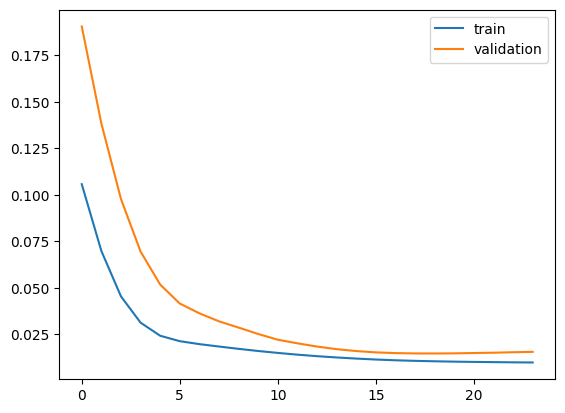

In [338]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='validation')
plt.legend()
plt.show()

In [339]:
yhat = model.predict(X_test)
X_test = X_test.reshape((X_test.shape[0], X_test.shape[2]))

inv_yhat = np.concatenate((yhat, X_test[:, 1:]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]

y_test = y_test.reshape((len(y_test), 1))
inv_y = np.concatenate((y_test, X_test[:, 1:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]

rmse = np.sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)

19/19 [==============================] - 0s 2ms/step
Test RMSE: 94.619


In [340]:
nsamples, nx, ny = X_train.shape
xtq = X_train.reshape((nsamples,nx*ny))

In [341]:
train_predict=model.predict(X_train)

35/35 [==============================] - 0s 2ms/step


In [342]:
X_train = X_train.reshape((X_train.shape[0], X_train.shape[2]))

train_predict = np.concatenate((train_predict, X_train[:, 1:]), axis=1)
train_predict = scaler.inverse_transform(X_train)

In [343]:
train_predict.shape

(1095, 10)

In [344]:
xt = np.concatenate((yhat, X_test[:, 1:]), axis=1)
test_predict=scaler.inverse_transform(xt)

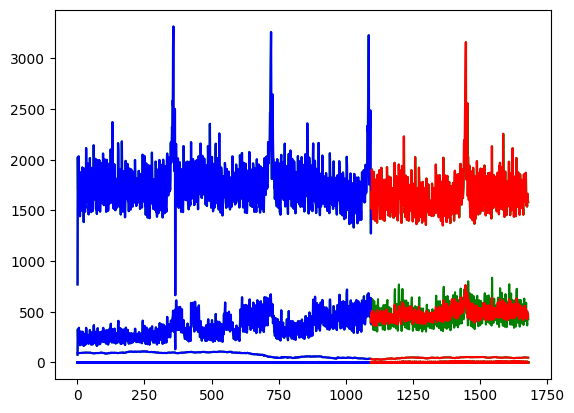

In [345]:

look_back=1
# trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot = np.empty_like(s_values)

trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = np.empty_like(s_values)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)-3:len(s_values)-1, :] = test_predict
# testPredictPlot[1200:] = test_predict

# plot baseline and predictions
plt.plot(scaler.inverse_transform(s_values), color = 'green')
plt.plot(trainPredictPlot, color = 'blue')
plt.plot(testPredictPlot, color = 'red')
# plt.plot(test_predict)

plt.show()

In [346]:
# from torch.utils.data import Dataset

# class TimeSeriesDataset(Dataset):
#     def __init__(self, X, y):
#         self.X = X
#         self.y = y

#     def __len__(self):
#         return len(self.X)

#     def __getitem__(self, i):
#         i=i.to(torch.float32)
#         return self.X[i], self.y[i]
    
# train_dataset = TimeSeriesDataset(X_train, y_train)
# test_dataset = TimeSeriesDataset(X_test, y_test)

In [347]:
# train_dataset.info()

In [348]:
# from torch.utils.data import DataLoader

# batch_size = 128

# train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
# test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

In [349]:
# device = 'cuda:0' if torch.cuda.is_available() else 'cpu'
# for _, batch in enumerate(train_loader):
#     x_batch, y_batch = batch[0].to(device), batch[1].to(device)
#     print(x_batch.shape, y_batch.shape)
#     break

In [350]:
# import torch.nn as nn
# class LSTM(nn.Module):
#     def __init__(self, input_size, hidden_size, num_stacked_layers):
#         super().__init__()
#         self.hidden_size = hidden_size
#         self.num_stacked_layers = num_stacked_layers

#         self.lstm = nn.LSTM(input_size, hidden_size, num_stacked_layers, 
#                             batch_first=True)
        
#         self.fc = nn.Linear(hidden_size, 1)

#     def forward(self, x):
#         x=
#         batch_size = x.size(0)
#         h0 = torch.zeros(self.num_stacked_layers, batch_size, self.hidden_size).to(device)
#         c0 = torch.zeros(self.num_stacked_layers, batch_size, self.hidden_size).to(device)
        
#         out, _ = self.lstm(x, (h0, c0))
#         out = self.fc(out[:, -1, :])
#         return out

# model = LSTM(10, 100, 1)
# model.to(device)
# model

In [351]:
# def train_one_epoch():
#     model.train(True)
#     print(f'Epoch: {epoch + 1}')
#     running_loss = 0.0
    
#     for batch_index, batch in enumerate(train_loader):
#         x_batch, y_batch = batch[0].to(device), batch[1].to(device)
        
#         output = model(x_batch)
#         loss = loss_function(output, y_batch)
#         running_loss += loss.item()
        
#         optimizer.zero_grad()
#         loss.backward()
#         optimizer.step()

#         if batch_index % 100 == 99: 
#             avg_loss_across_batches = running_loss / 100
#             print('Batch {0}, Loss: {1:.3f}'.format(batch_index+1,
#                                                     avg_loss_across_batches))
#             running_loss = 0.0
#     print()

In [352]:
# def validate_one_epoch():
#     model.train(False)
#     running_loss = 0.0
    
#     for batch_index, batch in enumerate(test_loader):
#         x_batch, y_batch = batch[0].to(device), batch[1].to(device)
        
#         with torch.no_grad():
#             output = model(x_batch)
#             loss = loss_function(output, y_batch)
#             running_loss += loss.item()

#     avg_loss_across_batches = running_loss / len(test_loader)
    
#     print('Val Loss: {0:.3f}'.format(avg_loss_across_batches))
#     print()

In [353]:
# learning_rate = 0.0001
# num_epochs = 50
# loss_function = nn.MSELoss()
# optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

# for epoch in range(num_epochs):
#     train_one_epoch()
#     validate_one_epoch()